In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
import csv
import numpy
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle
from snownlp import SnowNLP
from snownlp import sentiment
import akshare as ak
import datetime
from dateutil.relativedelta import relativedelta
import time
import tensorflow as tf
from joblib import dump, load

In [5]:
def relative_time(use_now=True, date_string=None, date_format=None, years=0, months=0, days=0, leapdays=0, weeks=0, hours=0, minutes=0, seconds=0, microseconds=0):
    relative_delta = relativedelta(years=years, months=months, days=days, leapdays=leapdays, weeks=weeks, hours=hours,
                                   minutes=minutes, seconds=seconds, microseconds=microseconds)
    _date = datetime.datetime.now() if use_now else datetime.datetime.strptime(date_string, date_format)
    return (_date + relative_delta).strftime("%Y-%m-%d")
def relative_time_stock(use_now=True, date_string=None, date_format=None, years=0, months=0, days=0, leapdays=0, weeks=0, hours=0, minutes=0, seconds=0, microseconds=0):
    relative_delta = relativedelta(years=years, months=months, days=days, leapdays=leapdays, weeks=weeks, hours=hours,
                                   minutes=minutes, seconds=seconds, microseconds=microseconds)
    _date = datetime.datetime.now() if use_now else datetime.datetime.strptime(date_string, date_format)
    return (_date + relative_delta).strftime("%Y%m%d")

In [6]:
input = "2024-05-09"
time1 = relative_time(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -1)
time2 = relative_time(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -2)
time1s = relative_time_stock(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -1)
time2s = relative_time_stock(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -2)
print(time1s)

20240508


In [7]:
dataset = pd.read_csv("002230.csv")
#print(dataset)

In [8]:
dataset['sense']=0
for i in range(len(dataset)):
    strlen = dataset.loc[i,'title']
    #print(len(strlen))
    s = SnowNLP(strlen)
    dataset.loc[i,'sense']=s.sentiments
    dataset.loc[i,'timetot']=dataset.loc[i,'timetot'][0:10]

C:\Users\zhang\AppData\Local\Temp\ipykernel_24396\2264974108.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3157894736842105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[i,'sense']=s.sentiments


In [9]:
dataset = dataset.drop(['title','herf','name','time','sum'],axis=1)

In [31]:
def search_sense_daily(date):
    sum_search_pos = 0
    sum_search_neg = 0
    sum_tot = 0
    for i,row in dataset.iterrows():
        if(row['timetot'] == date):
            if(row['sense'] < 0.5):
                sum_search_pos = sum_search_pos + ( row['read'] + row['reply'] * 10)
            else:
                sum_search_neg = sum_search_neg + ( row['read'] + row['reply'] * 10)
    temp = (sum_search_pos + 1) / (sum_search_neg + 1)
    return math.log(temp, math.e)

In [56]:
def fit(X_test):
    with open('KNN 2.pkl','rb') as f:
        KNN = pickle.load(f)
    with open('KNN tianchong 2.pkl','rb') as f:
        KNNtc = pickle.load(f)
    with open('Linear SVC 2.pkl','rb') as f:
        LinearSVC = pickle.load(f)
    with open('Linear SVC tianchong 2.pkl','rb') as f:
        LinearSVCtc = pickle.load(f)
    with open('LogReg 2.pkl','rb') as f:
        LogReg = pickle.load(f)
    with open('LogReg tianchong 2.pkl','rb') as f:
        LogRegtc = pickle.load(f)
    with open('Naive Bayes 2.pkl','rb') as f:
        Bayes = pickle.load(f)
    with open('Naive Bayes tianchong 2.pkl','rb') as f:
        Bayestc = pickle.load(f)
    with open('SVC 2.pkl','rb') as f:
        SVC = pickle.load(f)
    with open('SVC tianchong 2.pkl','rb') as f:
        SVCtc = pickle.load(f)
    tensor = tf.keras.models.load_model('tensorflow.h5')
    tensortc = tf.keras.models.load_model('tensorflowtc.h5')
    #X_test = np.array([per,sense1,sense2]).reshape(1,-1)
    print(KNNtc.predict(X_test),LinearSVCtc.predict(X_test),LogRegtc.predict(X_test),Bayestc.predict(X_test),SVCtc.predict(X_test),tensor.predict(X_test))
    print(KNN.predict(X_test),LinearSVC.predict(X_test),LogReg.predict(X_test),Bayes.predict(X_test),SVC.predict(X_test),tensortc.predict(X_test))
    

In [40]:
def get_weekday(date):
    date_obj = datetime.strptime(date, '%Y-%m-%d')
    weekday_num = date_obj.weekday()
    weekdays = ['1', '2', '3', '4', '5', '6', '7']
    weekday = weekdays[weekday_num]
    return weekday

In [62]:
input = "2024-05-16"
time1 = relative_time(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -1)
time2 = relative_time(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -2)
time1s = relative_time_stock(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -1)
time2s = relative_time_stock(use_now=False, date_string=input, date_format="%Y-%m-%d", days = -2)
sense1 = search_sense_daily(time2)
sense2 = search_sense_daily(time1)
stock = ak.stock_zh_a_hist(symbol="002230", period="daily", start_date=time1s, end_date=time1s, adjust="")
per = stock.loc[0,'涨跌幅']
X_test = np.array([per,sense1,sense2]).reshape(1,-1)
#X_test = np.array([2,0.5,0.5]).reshape(1,-1)
std = load('std.joblib')
X_test = std.transform(X_test)
print(X_test)
fit(X_test)
#改动input的值即可，要求想要预测的前一天有开盘
#第一行是前一天涨跌幅，前天情绪和昨天情绪的标准化后的结果
#解释：前五个代表不同模型的预测，最后一个为神经网络预测其为涨的概率
#0为跌，1为涨

[[-0.43937982 -1.63171593 -1.55503623]]
1/1 [==============================] - 0s 38ms/step
[0] [0] [0] [0] [0] [[0.617307]]
1/1 [==============================] - ETA: 0s

C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
[0] [0] [0] [0] [0] [[0.10317549]]


In [104]:
sss = ak.stock_zh_a_hist(symbol="002230", period="daily", start_date='20240426', end_date='20240516', adjust="")
print(sss)

            日期     开盘     收盘     最高     最低     成交量           成交额    振幅   涨跌幅  \
0   2024-04-26  43.00  44.35  44.66  43.00  434628  1.923458e+09  3.86  3.19   
1   2024-04-29  44.86  45.51  46.34  44.83  491377  2.242164e+09  3.40  2.62   
2   2024-04-30  45.40  45.11  45.96  44.80  307000  1.390958e+09  2.55 -0.88   
3   2024-05-06  46.20  45.53  46.38  45.28  329708  1.511083e+09  2.44  0.93   
4   2024-05-07  45.53  45.60  46.50  45.19  349606  1.603513e+09  2.88  0.15   
5   2024-05-08  45.13  44.34  45.15  44.24  251419  1.120042e+09  2.00 -2.76   
6   2024-05-09  44.36  44.67  44.94  44.21  211639  9.436528e+08  1.65  0.74   
7   2024-05-10  44.45  43.75  44.74  43.66  277932  1.221496e+09  2.42 -2.06   
8   2024-05-13  44.00  44.10  44.78  43.41  266239  1.174416e+09  3.13  0.80   
9   2024-05-14  44.74  43.53  44.85  43.37  320658  1.403404e+09  3.36 -1.29   
10  2024-05-15  43.27  43.00  43.50  42.87  177294  7.646877e+08  1.45 -1.22   
11  2024-05-16  43.22  42.84  43.46  42.

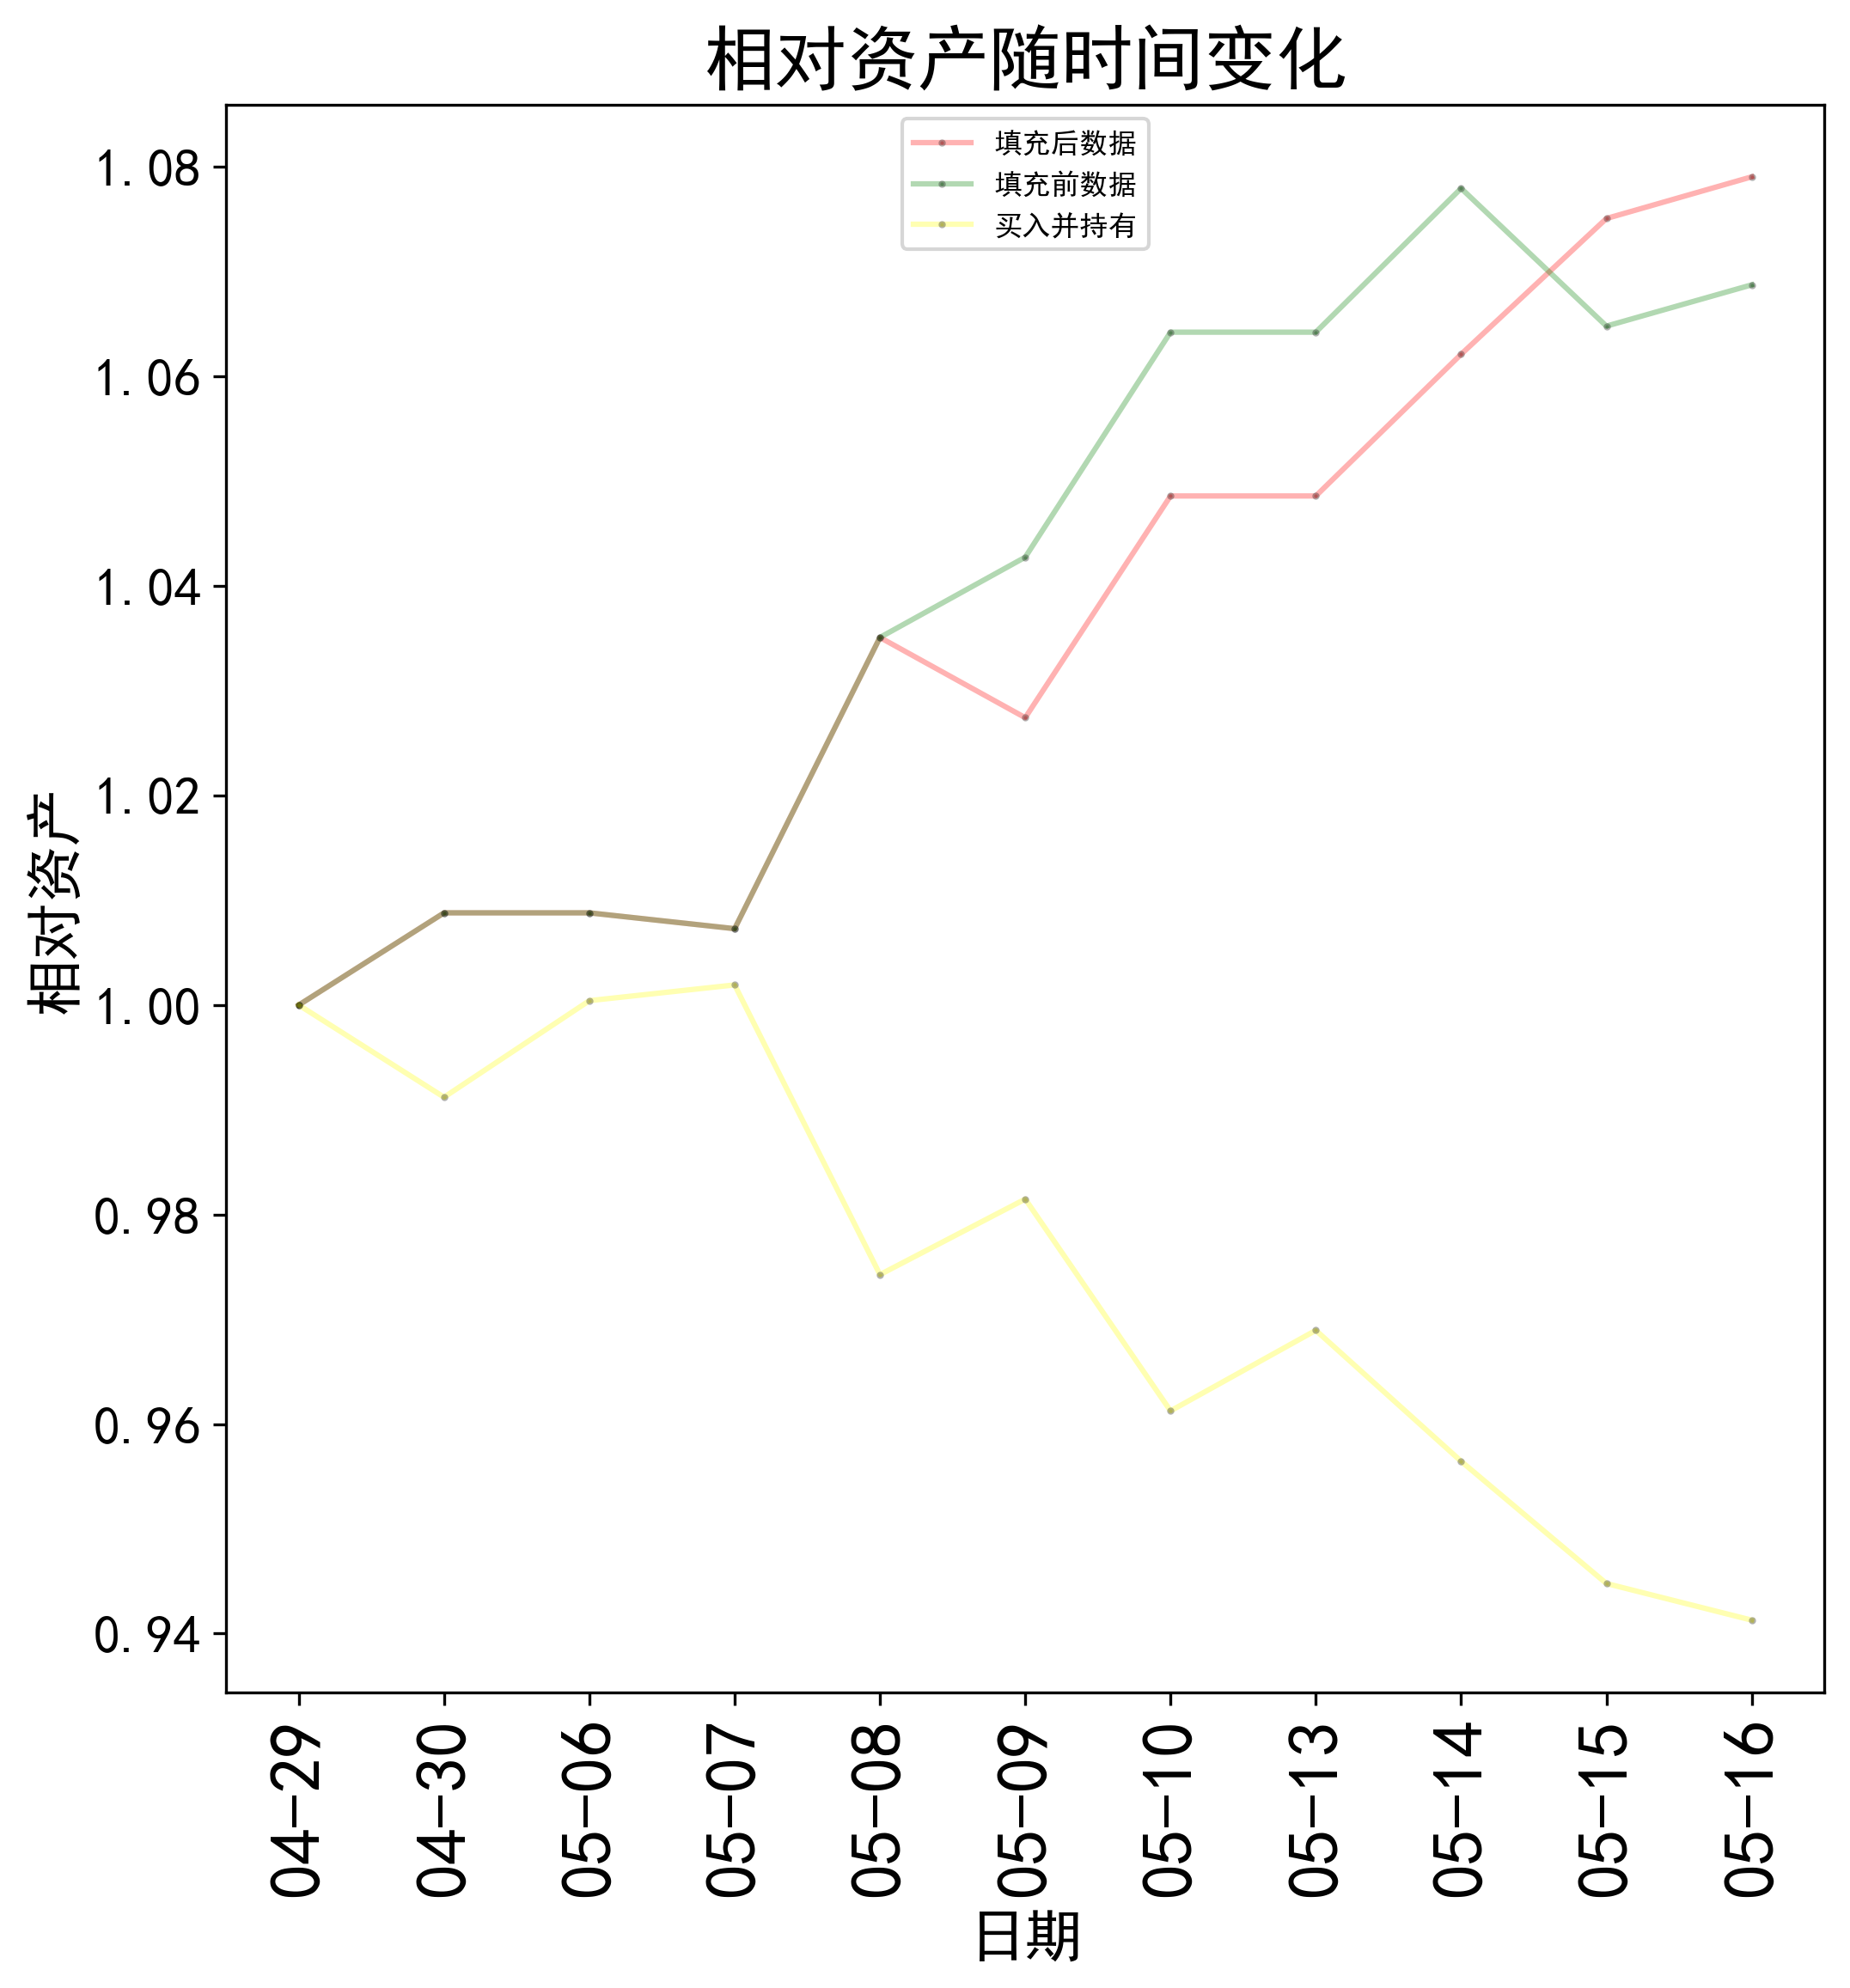

In [74]:
y_tc = [0.88, 0, -0.15, 2.76, -0.74, 2.06, 0, 1.29, 1.22, 0.37]
y_notc = [0.88, 0, -0.15, 2.76, 0.74, 2.06, 0, 1.29, -1.22, 0.37]
y = [-0.88, 0.93, 0.15, -2.76, 0.74, -2.06, 0.8, -1.29, -1.22, -0.37]
y1 = []
y2 = []
y3 = []
x = ["04-29", "04-30", "05-06", "05-07", "05-08", "05-09", "05-10", "05-13", "05-14", "05-15", "05-16"]
temp1 = 1
temp2 = 1
temp3 = 1
y1.append(temp1)
y2.append(temp2)
y3.append(temp3)
for i in range(len(x) - 1):
    temp1 = temp1 * (1 + y_tc[i] / 100)
    temp2 = temp2 * (1 + y_notc[i] / 100)
    temp3 = temp3 * (1 + y[i] / 100)
    y1.append(temp1)
    y2.append(temp2)
    y3.append(temp3)

plt.figure(dpi=300,figsize=(8,8))
plt.rcParams['axes.unicode_minus']=False
plt.xlabel("日期",fontsize=16)
plt.ylabel("相对资产",fontsize=16)
plt.xticks(fontsize=20,color="black",rotation=90)
plt.yticks(fontsize=15,color="black")
plt.rcParams.update({"font.size":20})
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("相对资产随时间变化",fontsize=20)
line1, = plt.plot(x, y1, color='red', alpha = 0.3, linewidth=1.5, linestyle='-', label='填充后', marker = '.', markersize = '2', markeredgecolor = 'black')
line2, = plt.plot(x, y2, color='green', alpha = 0.3, linewidth=1.5, linestyle='-', label='填充前', marker = '.', markersize = '2', markeredgecolor = 'black')
line3, = plt.plot(x, y3, color='yellow', alpha = 0.3, linewidth=1.5, linestyle='-', label='买入并持有', marker = '.', markersize = '2', markeredgecolor = 'black')

plt.legend(handles = [line1, line2, line3], labels = ["填充后数据", "填充前数据", "买入并持有"], loc = 'upper center', prop = {'size' : 8})
plt.show()
